In [1]:
import sklearn
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_0 = os.getcwd()
# print(path_0)

data_path = os.path.join(path_0, 'datasets')
path_1 = data_path
# print(path_1)

# os.chdir(path_1)
file_path = os.path.join(path_1, 'creditcard')
data = pd.read_csv(file_path)

# UNIVARIATE ANALYSIS

In [3]:
data.shape

(284807, 31)

In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isna().sum()/len(data)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [9]:
# Trova le righe duplicate
duplicati = data.duplicated()

# Stampa le righe duplicate
print(data[duplicati])

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [10]:
## è possibile osservare che tutte le features sono state standardizzate in qualche modo, 
# eccetto 'Time' e 'Amount'. 
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler
# Crea una copia del DataFrame originale
df = data.copy()

# Inizializza StandardScaler
scaler = StandardScaler()

# Seleziona le feature da riscalare
features_to_scale = ['Time', 'Amount']

# Riscalare le feature selezionate
df[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


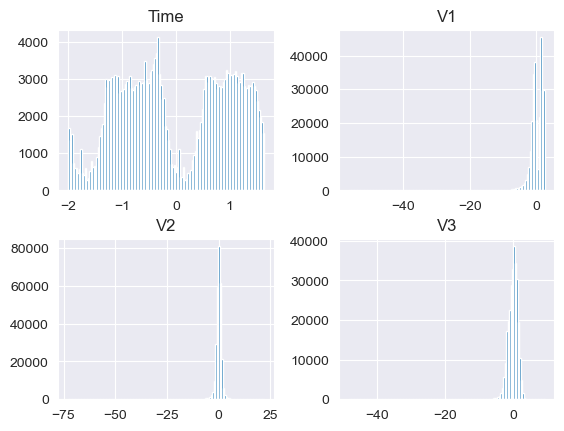

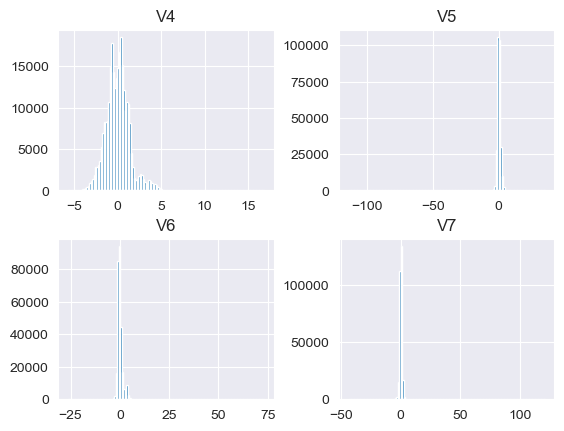

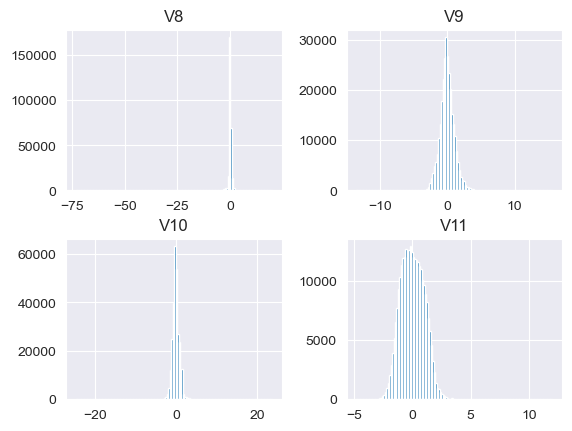

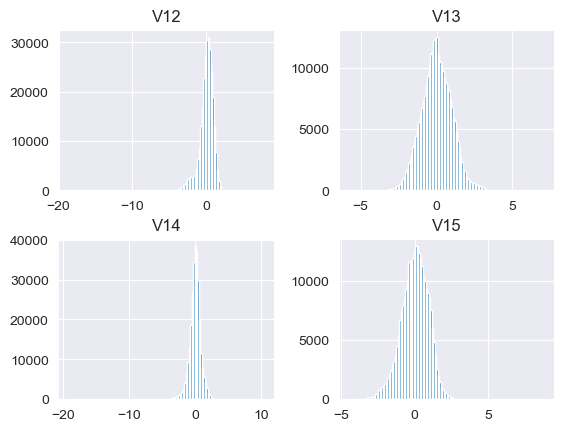

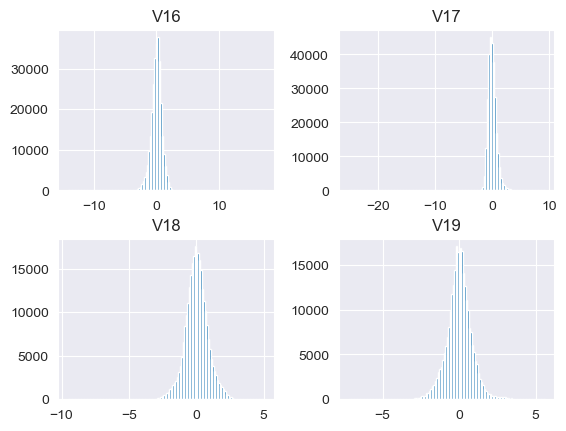

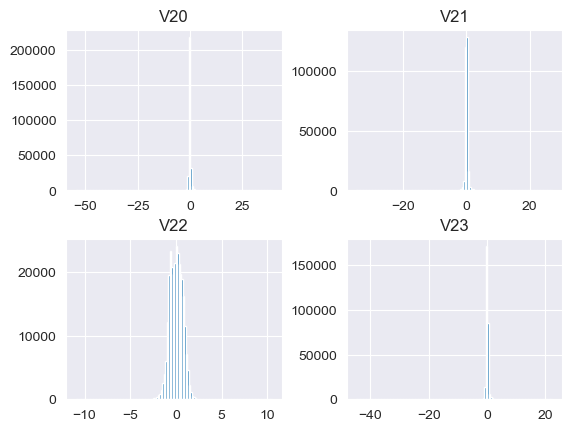

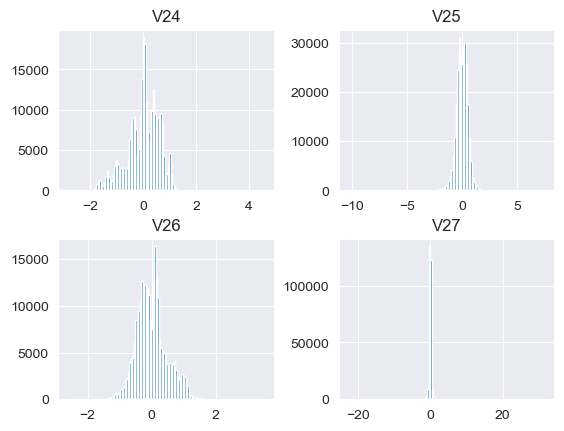

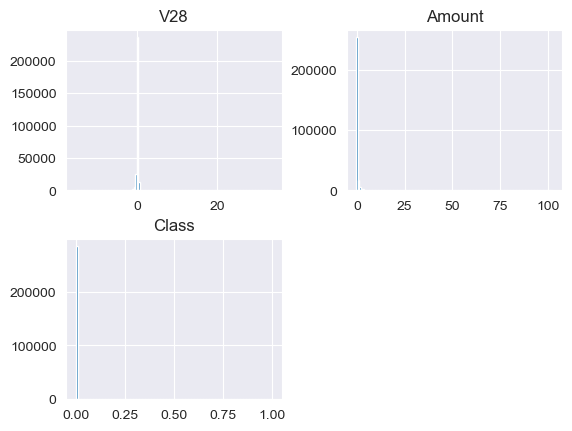

In [37]:
lower, upper = 0, 4
delta = upper - lower

for i in range(round(df.shape[1]/delta)):
    low = lower + i*delta
    up =  upper + i*delta 
    df.iloc[:, low:up].hist(bins="rice")
    plt.show()

In [38]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<AxesSubplot: >

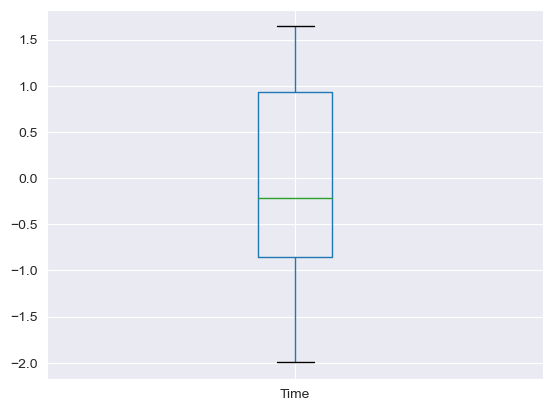

In [39]:
df[['Time']].boxplot()

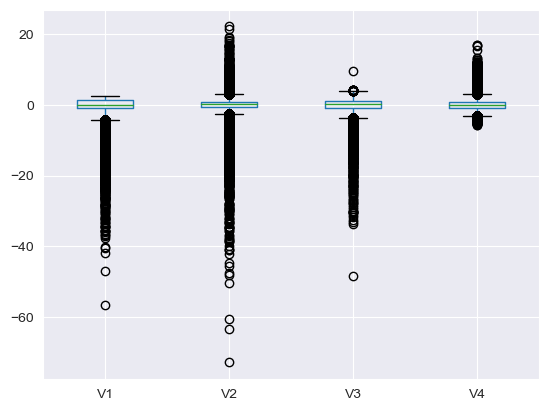

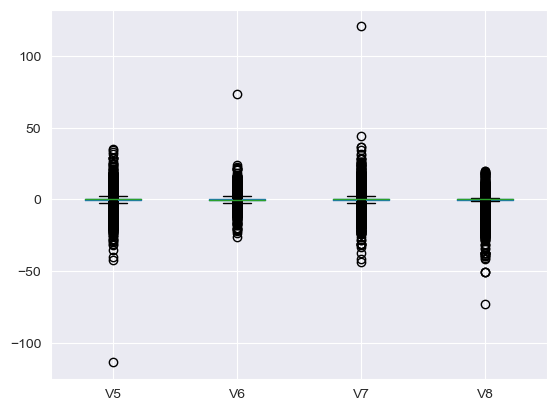

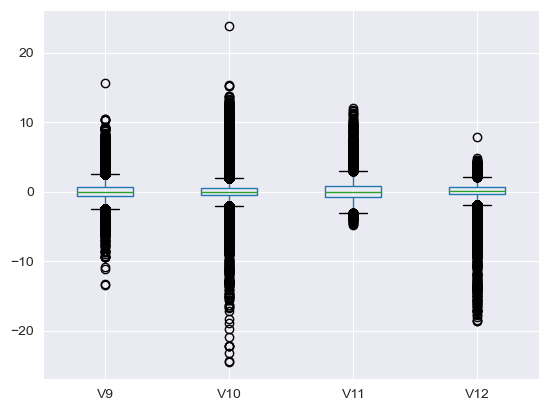

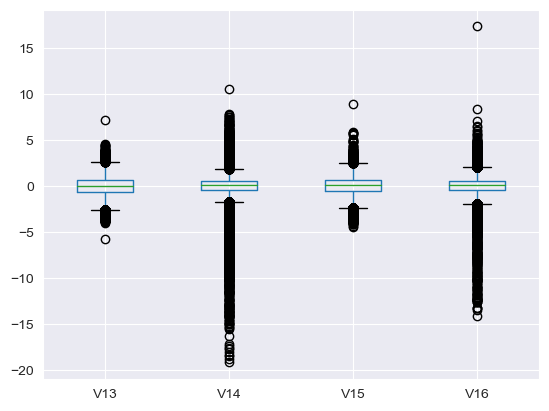

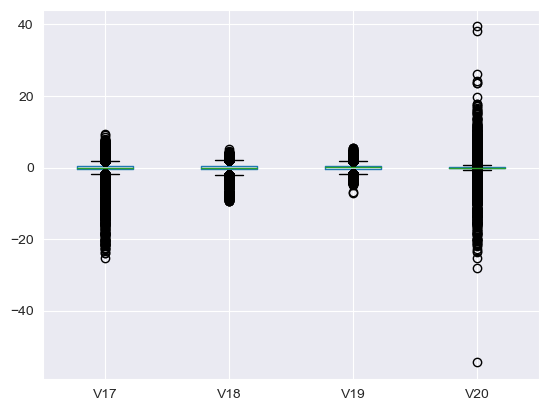

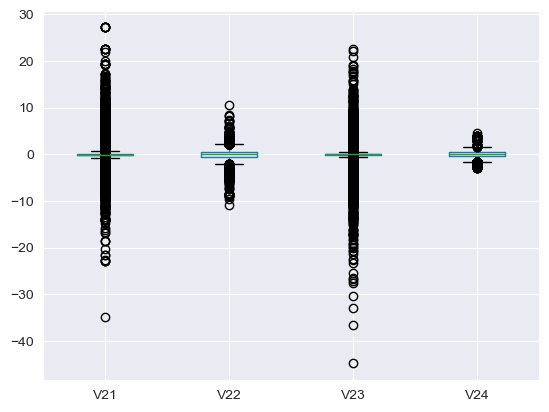

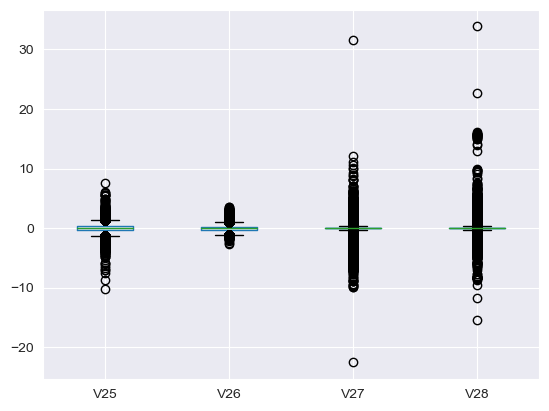

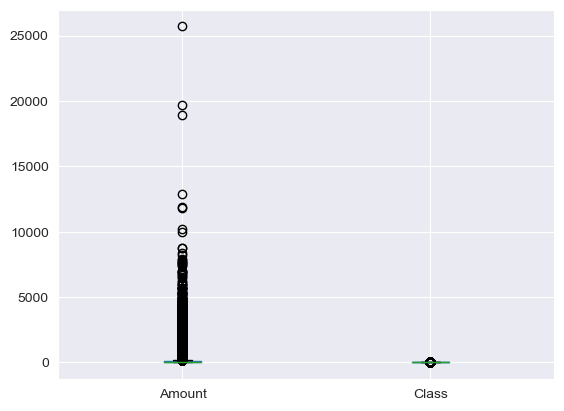

In [40]:
## esploro i boxplot di ogni feature
## possiamo vedere:
## i) molte transazioni che superano l'intervallo interquartile (outlier)
## ii) distribuzione skewed delle caratteristiche (in generale)

lower, upper = 1, 5
delta = upper - lower

for i in range(round(data.shape[1]/delta)):
    low = lower + i*delta
    up =  upper + i*delta 
    data.iloc[:, low:up].boxplot()
    plt.show()

# MULTIVARIATE ANALYSIS

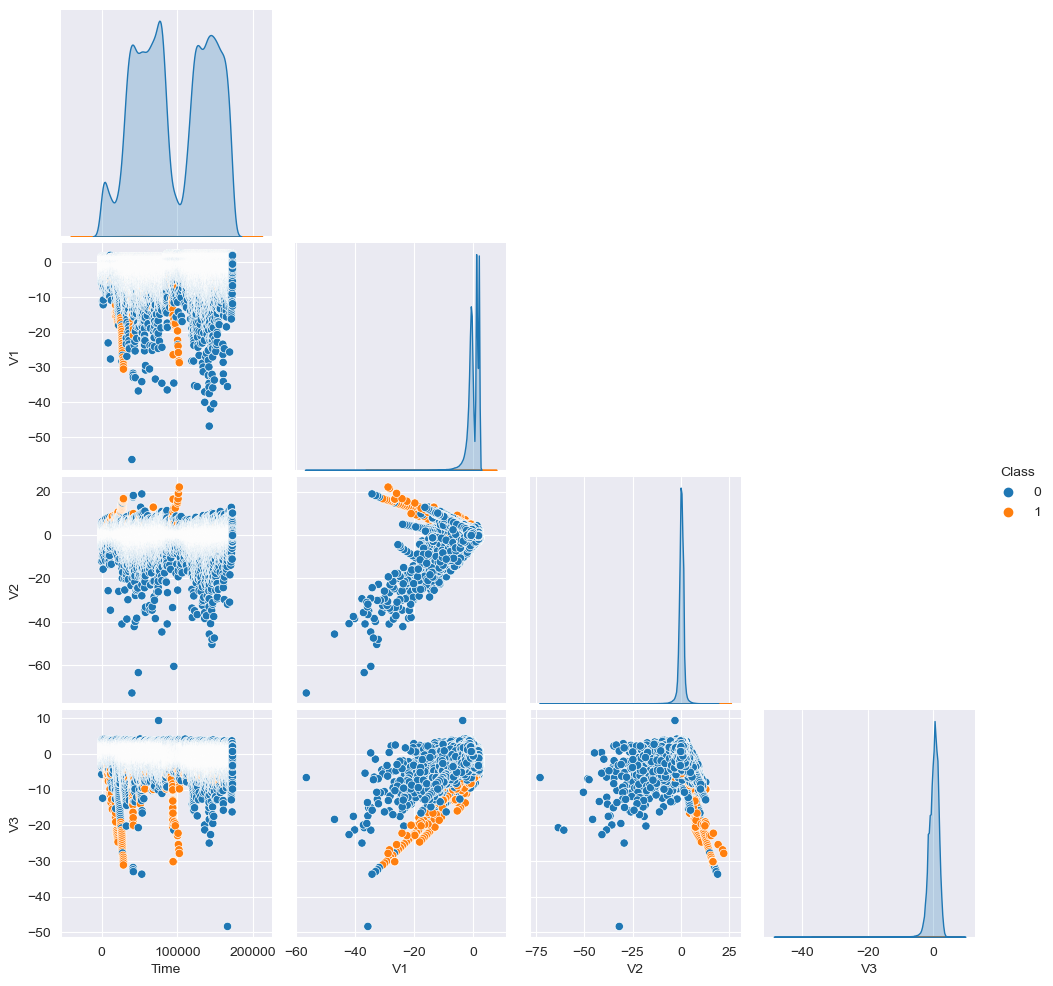

In [14]:
my_data = data.iloc[:, [30] + list(range(0, 4))]
sns.pairplot(my_data, corner=True, hue='Class')

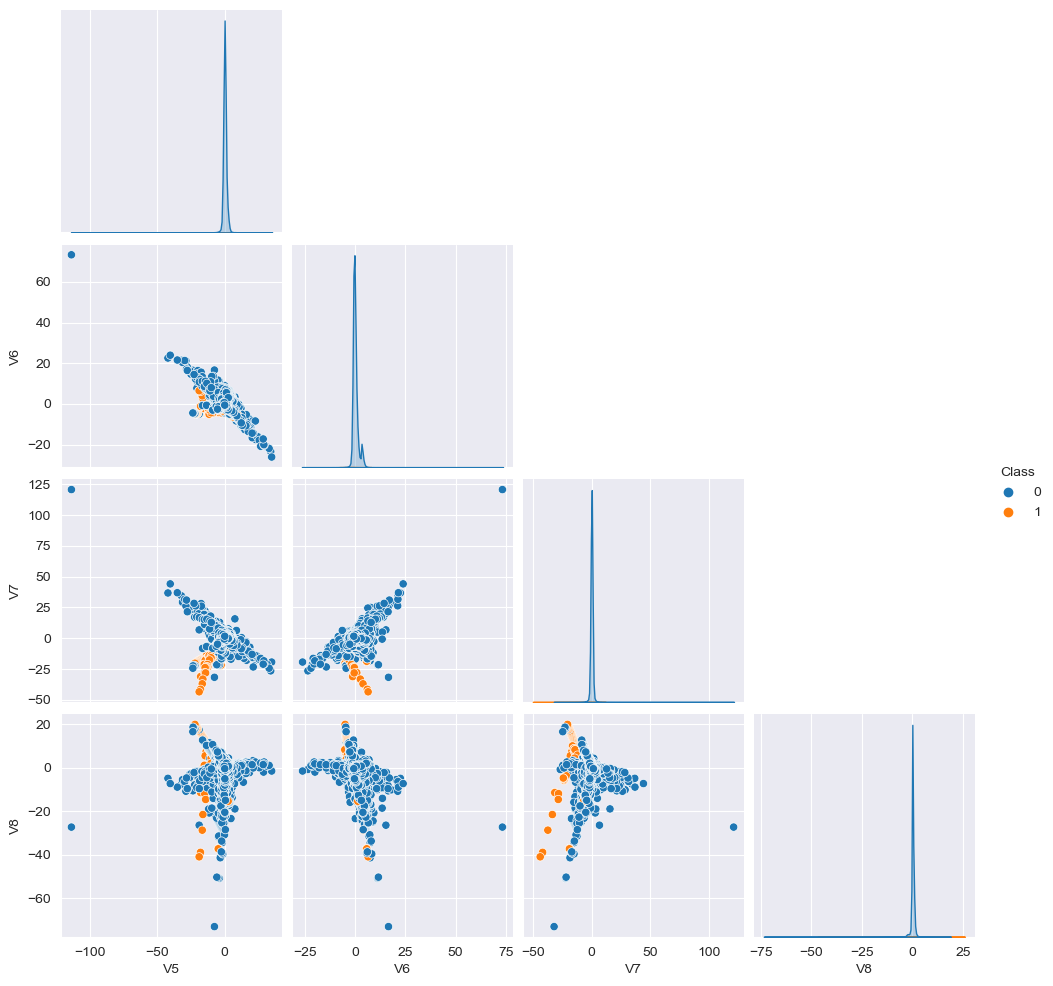

In [15]:
my_data = data.iloc[:, [30] + list(range(5, 9))]
sns.pairplot(my_data, corner=True, hue='Class')

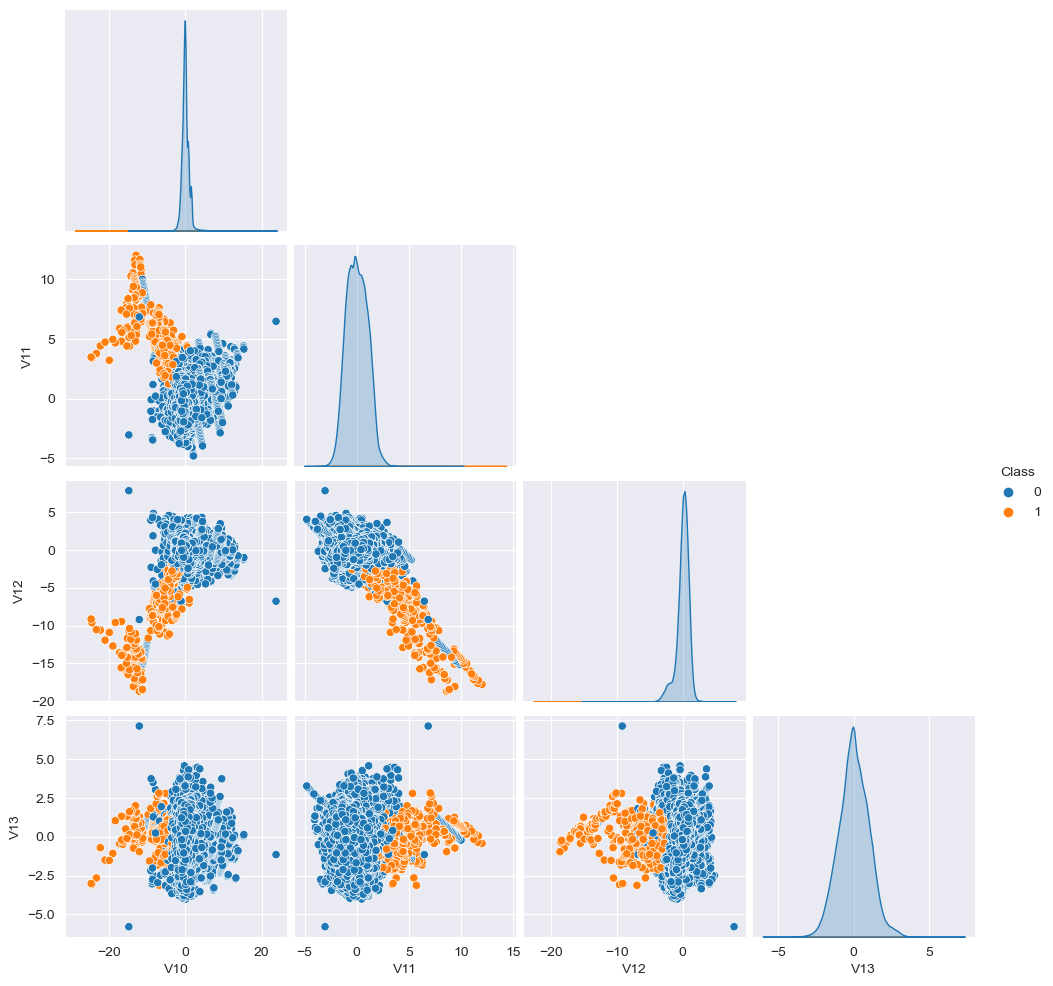

In [16]:
my_data = data.iloc[:, [30] + list(range(10, 14))]
sns.pairplot(my_data, corner=True, hue='Class')

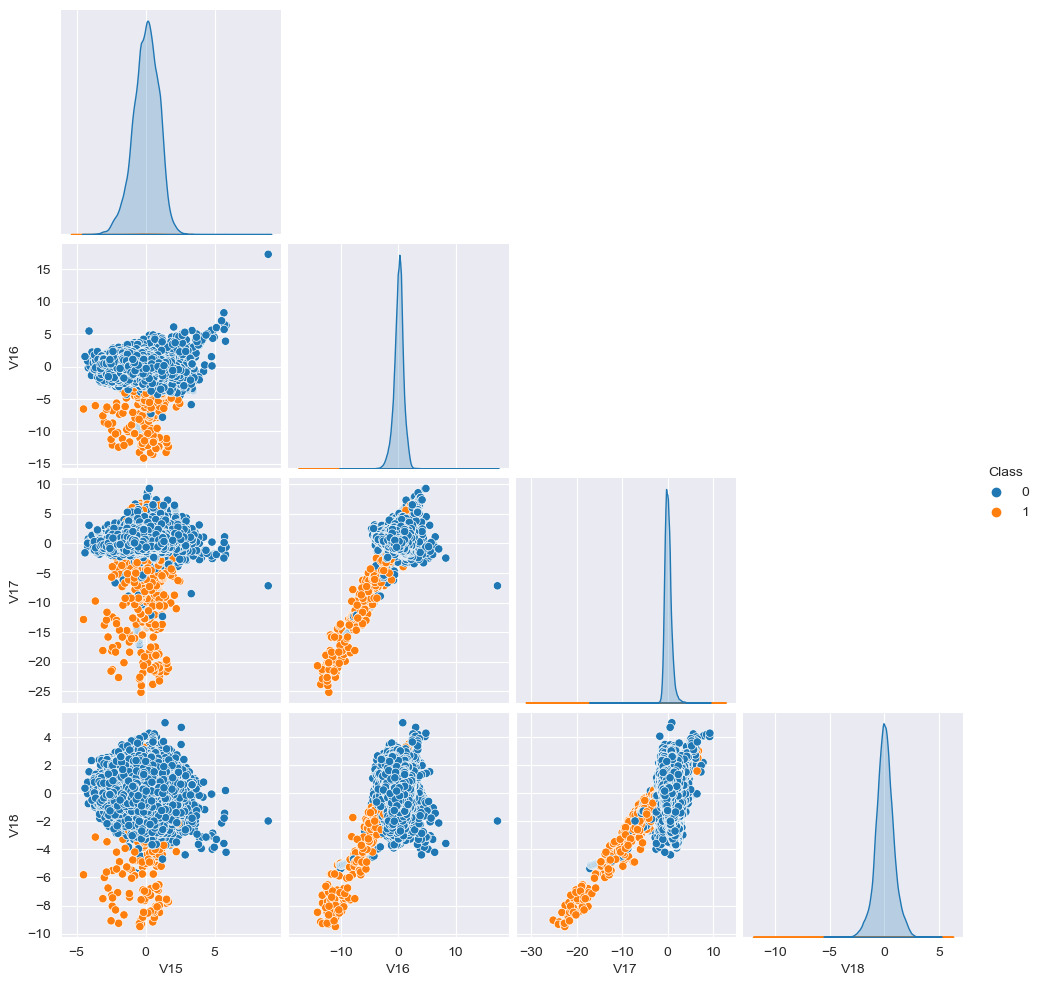

In [17]:
my_data = data.iloc[:, [30] + list(range(15, 19))]
sns.pairplot(my_data, corner=True, hue='Class')

In [ ]:
my_data = data.iloc[:, [30] + list(range(20, 24))]
sns.pairplot(my_data, corner=True, hue='Class')

In [ ]:
my_data = data.iloc[:, [30] + list(range(25, 29))]
sns.pairplot(my_data, corner=True, hue='Class')

In [ ]:
my_data = data.iloc[:, list(range(28, 31))]
sns.pairplot(my_data, corner=True, hue='Class')

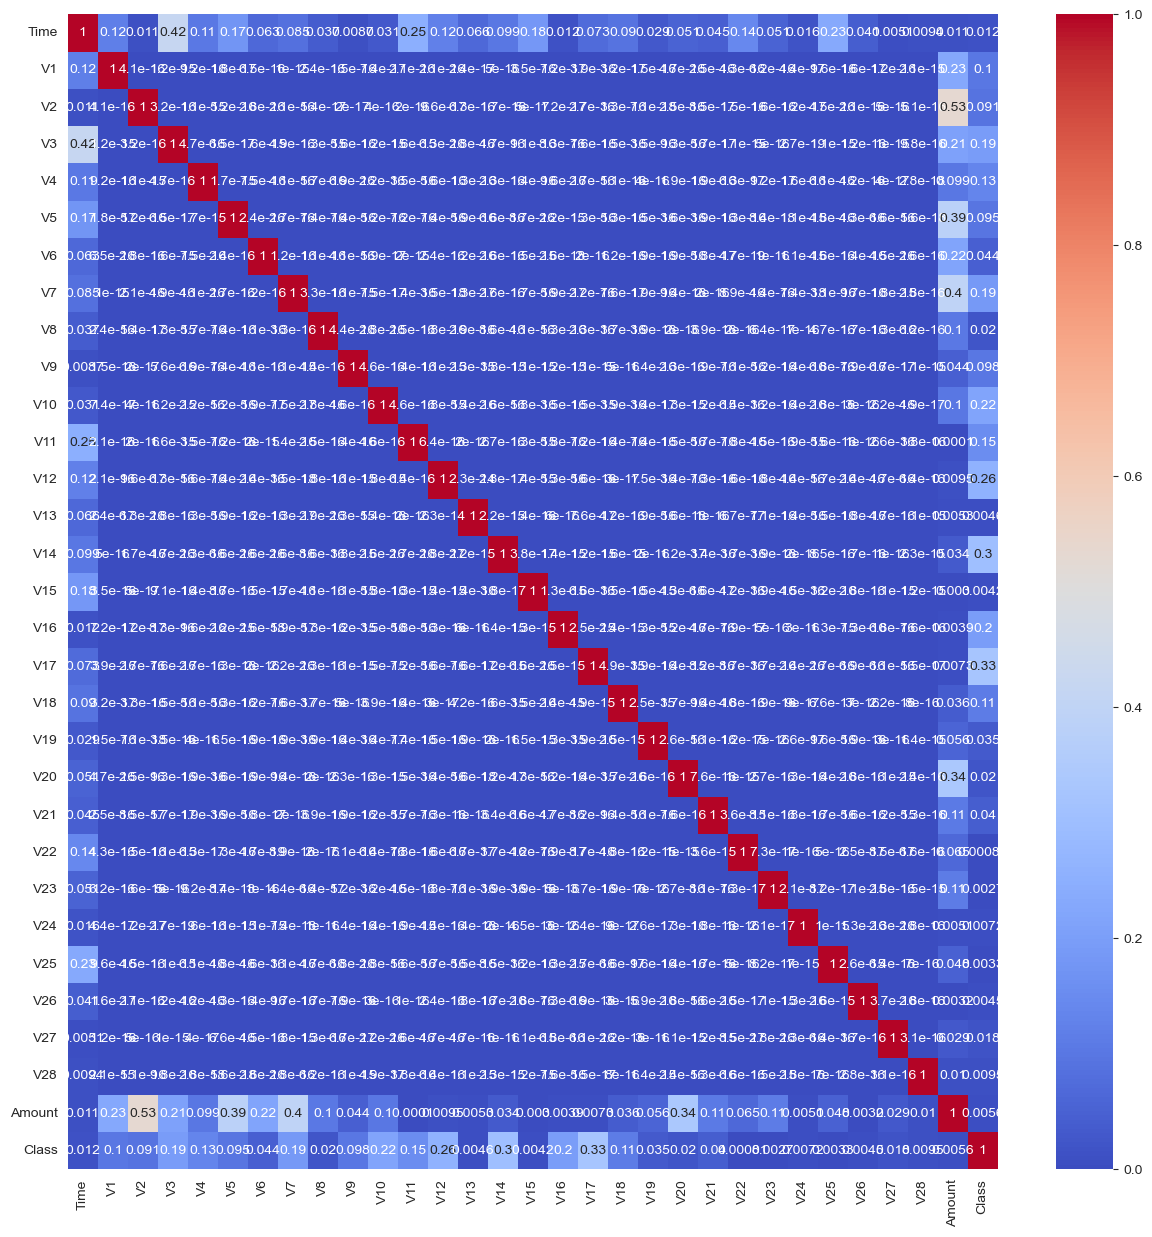

In [41]:
## Calcola la matrice di correlazione in valore assoluto
## essendo il dataset già stato sottoposto a PCA, le features sono già abbastanza  decorrelate tra di loro

corr_matrix = df.corr().abs()

plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix,  annot=True, cmap='coolwarm')
plt.show()


In [43]:
# grafichiamo la explained variance dalle features
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [68]:
## Rimuovi la colonna delle etichette dal DataFrame  
df_feat = df.drop('Class', axis=1)
y = df['Class']

In [46]:
## Inizializza la PCA
pca = PCA()

## Adatta il modello PCA ai dati
pca.fit(df_feat)

## Calcola la varianza spiegata
explained_variance = pca.explained_variance_ratio_

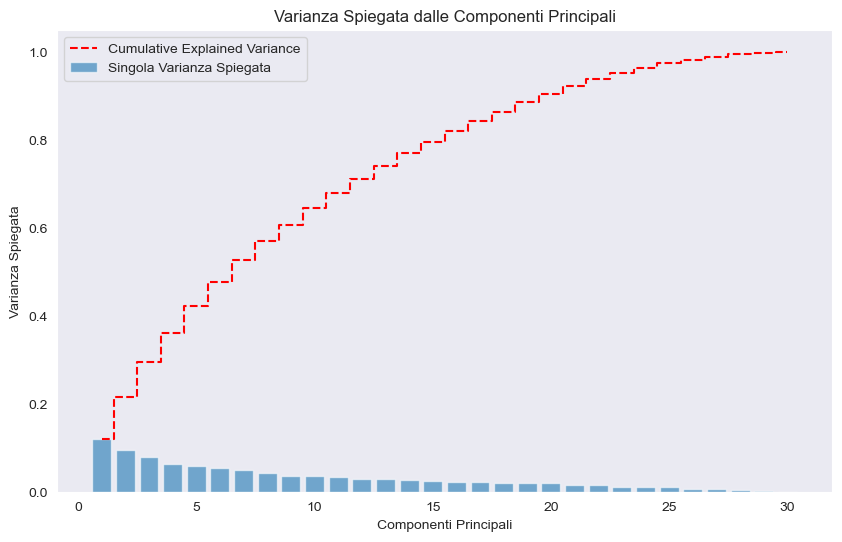

In [47]:
# Crea la figura
plt.figure(figsize=(10, 6))

# Plot della varianza spiegata
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center', label='Singola Varianza Spiegata')
plt.step(range(1, len(np.cumsum(explained_variance)) + 1), np.cumsum(explained_variance), where='mid', linestyle='--', color='red', label='Cumulative Explained Variance')

# Aggiungere etichette e titolo al grafico
plt.xlabel('Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata dalle Componenti Principali')
plt.legend(loc='best')
plt.grid()
plt.show()


In [56]:
## dataframe con varianza_spiegata-nome_feature
explained_variance_df = pd.DataFrame({
    'Explained Variance': explained_variance,
    'Feature': df_feat.columns
})

## Ordina le features in base alla varianza spiegata
explained_variance_df = explained_variance_df.sort_values(by='Explained Variance', ascending=False)

## Stampa il risultato
print(explained_variance_df)

    Explained Variance Feature
0             0.120882    Time
1             0.096543      V1
2             0.079249      V2
3             0.065485      V3
4             0.060905      V4
5             0.054923      V5
6             0.049857      V6
7             0.043726      V7
8             0.036920      V8
9             0.036866      V9
10            0.035809     V10
11            0.030783     V11
12            0.030300     V12
13            0.028441     V13
14            0.026596     V14
15            0.023464     V15
16            0.022359     V16
17            0.021734     V17
18            0.021185     V18
19            0.020072     V19
20            0.017528     V20
21            0.016553     V21
22            0.013091     V22
23            0.011946     V23
24            0.011192     V24
25            0.007187     V25
26            0.006582     V26
27            0.004996     V27
28            0.003331     V28
29            0.001497  Amount


In [58]:
## imposto una soglia sulla varianza spiegata
expl_var_treshold = 0.8

## Calcola la varianza spiegata cumulativa 
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

## Trova il numero di componenti che spiegano l'80% della varianza 
num_components = np.argmax(explained_variance_cumulative >= expl_var_treshold) + 1 
print(f'Numero di componenti per spiegare l\'80% della varianza: {num_components}')

Numero di componenti per spiegare l'80% della varianza: 16


In [60]:
## Calcola i loadings per le componenti selezionate
loadings = pca.components_.T[:, :num_components] * np.sqrt(pca.explained_variance_[:num_components])

## Crea un DataFrame per i loadings e somma i valori assoluti dei loadings per ogni feature
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'PC{i+1}' for i in range(num_components)], 
                           index=df_feat.columns,
                           )

feature_importance = loadings_df.abs().sum(axis=1)

## Ordina le feature in base all'importanza
sorted_features = feature_importance.sort_values(ascending=False)

## Mostra le feature ordinate per importanza
print("Feature importance:")
print(sorted_features)

Feature importance:
V5        3.344155
V2        3.152300
V3        2.917304
V1        2.729944
V11       2.466495
V7        2.456909
V6        2.449373
V4        2.395005
Time      2.372752
Amount    2.137103
V12       2.093461
V10       1.870323
V13       1.678145
V8        1.667136
V14       1.626952
V15       1.577133
V9        1.336808
V16       0.927927
V20       0.428243
V18       0.309724
V22       0.301337
V17       0.275864
V25       0.236498
V21       0.144847
V19       0.132447
V23       0.129278
V26       0.036974
V24       0.021886
V27       0.013457
V28       0.006952
dtype: float64


In [63]:
## Seleziona le feature che contribuiscono all'80% della varianza
cumulative_importance = sorted_features.cumsum() / sorted_features.sum()
selected_features = cumulative_importance[cumulative_importance <= expl_var_treshold].index

## Mostra le feature selezionate
print(f"Feature che spiegano l'{int(expl_var_treshold*100)}% della varianza:")
print(selected_features)

Feature che spiegano l'80% della varianza:
Index(['V5', 'V2', 'V3', 'V1', 'V11', 'V7', 'V6', 'V4', 'Time', 'Amount',
       'V12', 'V10', 'V13'],
      dtype='object')
